In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def random_pm_matrix(N):
    return np.random.choice([-1, 1], size=(N, N))

# Example usage:
N = 5
matrix = random_pm_matrix(N)
print(matrix)

[[ 1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1]
 [ 1 -1  1 -1 -1]
 [-1 -1  1 -1 -1]
 [-1  1  1 -1  1]]


In [3]:
def update_matrix():
    

SyntaxError: incomplete input (643833435.py, line 2)

In [7]:


def entropy(probabilities):
    probs = np.array(probabilities)
    return -np.sum(probs * np.log(probs))

# Case 1: probabilities 1/2, 1/4, 1/4
case1 = [1/2, 1/4, 1/4]
entropy_case1 = entropy(case1)

# Case 2: probabilities 0.99, 0.005, 0.005
case2 = [0.99, 0.005, 0.005]
entropy_case2 = entropy(case2)

entropy_case1, entropy_case2


(1.0397207708399179, 0.06293300616044681)

In [8]:

rng = np.random.default_rng(42)

def simulate_trials(probs, n_trials=100000, strategy="random"):
    probs = np.array(probs, dtype=float)
    boxes = np.arange(len(probs))
    counts = []
    for _ in range(n_trials):
        # sample true box
        true_box = rng.choice(boxes, p=probs)
        if strategy == "random":
            # random order of guesses (without replacement)
            order = rng.permutation(boxes)
        elif strategy == "best_first":
            # deterministic order: highest-probability first
            order = np.argsort(-probs)
        else:
            raise ValueError("Unknown strategy")
        # number of questions until hit
        for i, guess in enumerate(order, start=1):
            if guess == true_box:
                counts.append(i)
                break
    return np.mean(counts)

cases = {
    "Case A (1/2, 1/4, 1/4)": [1/2, 1/4, 1/4],
    "Case B (0.99, 0.005, 0.005)": [0.99, 0.005, 0.005],
}

results = {}
for name, probs in cases.items():
    avg_random = simulate_trials(probs, strategy="random")
    avg_best = simulate_trials(probs, strategy="best_first")
    results[name] = (avg_random, avg_best)

results

{'Case A (1/2, 1/4, 1/4)': (1.999414, 1.749424),
 'Case B (0.99, 0.005, 0.005)': (1.99953, 1.014862)}

In [16]:
def sim_steps(probs, n=10000, p=1000, rules = "EitherOr"):
    money = np.zeros(p)
    probs = np.array(probs, dtype=float)
    if rules == "EitherOr":
        for _ in range(n):
            weights1 = np.random.rand(p)
            mask = weights1 < probs[0]           # boolean mask (True/False)
            money = np.where(mask, money + 1, 0)
    else:
        for _ in range(n):
            weights1 = np.random.rand(p)         # random numbers [0,1)
            weights2 = np.random.rand(p)         # random numbers [0,1)
            mask1 = weights1 < probs[0]             # element-wise compare
            mask2 = weights2 < probs[1]             # element-wise compare
            money += mask1.astype(int)
            money = np.where(mask2, 0, money)
        
    return money

In [26]:
dist = sim_steps([0.5,0.5],n=100000)

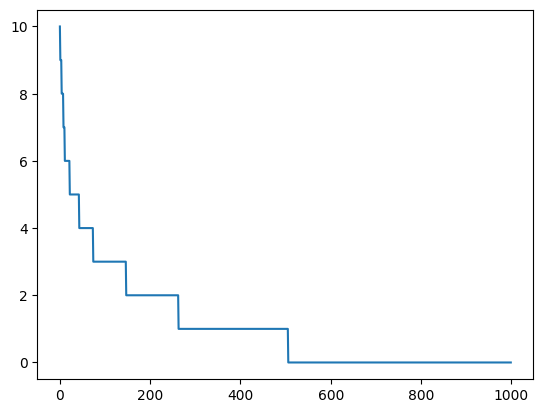

In [27]:
dist_sorted = np.sort(dist)[::-1]
plt.plot(dist_sorted)

In [28]:
print(np.mean(dist))

1.079


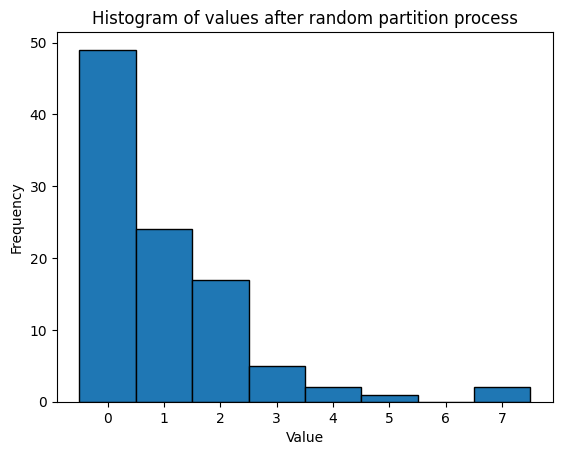

In [29]:
# parameters
N = 100          # number of sites
steps = 1000000

# initialize all values = 1
values = np.ones(N, dtype=int)

rng = np.random.default_rng()

for _ in range(steps):
    # pick two distinct indices A and B
    A, B = rng.choice(N, size=2, replace=False)
    
    total = values[A] + values[B]
    
    # partition into A0 and B0 (random integer split)
    A0 = rng.integers(0, total + 1)  # inclusive of total
    B0 = total - A0
    
    values[A] = A0
    values[B] = B0

# plot histogram of the values
plt.hist(values, bins=range(values.max() + 2), edgecolor='k', align='left')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of values after random partition process")
plt.show()

In [15]:
s = np.random.choice([-1, 1], size=(N, N))
print(s)
print(np.roll(s, shift=-1, axis=0))

[[ 1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1]
 [-1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1]
 [-1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1]
 [-1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1]
 [ 1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1  1 -1]
 [-1  1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1]
 [-1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1]
 [-1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1]
 [-1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1]
 [-1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1]
 [-1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1]
 [-1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1]
 [ 1 -1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1]
 [-1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1]
 [ 1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1

In [92]:
print(np.exp(-8*kb/(kb*10)))

0.44932896411722156


In [145]:
#1.9
#1
N=50
kb = 1.380649 * 10**(-23)
Ti = 2.27
n = 1000000
n0 = n/4

def delta_energy(matrix, i, j, J=kb):
    N = matrix.shape[0]
    s = matrix[i, j]
    
    # Periodic boundary conditions
    neighbors = [
        matrix[(i-1) % N, j],  # up
        matrix[(i+1) % N, j],  # down
        matrix[i, (j-1) % N],  # left
        matrix[i, (j+1) % N]   # right
    ]
    
    return 2*J * s * sum(neighbors)

def blotz(dE,T=Ti,k=kb):
    return np.exp(-dE/(k*T))
    
def spin_flip(matrix, i, j, dE):
    w = np.random.rand(1)
    if dE <= 0 or w <= blotz(dE):
        matrix[i,j] = -1*matrix[i,j]
        return dE
    else:
        return 0

def magnetic(matrix):
    return matrix.mean()

def total_energy(matrix, J=kb):
    """
    Total Ising energy with periodic BCs. Counts each bond once.
    """
    N = matrix.shape[0]
    # Right and Down neighbors to avoid double-counting
    s = matrix
    E = 0.0
    E -= J * np.sum(s * np.roll(s, shift=-1, axis=0))  # vertical bonds
    E -= J * np.sum(s * np.roll(s, shift=-1, axis=1))  # horizontal bonds
    return E

def simulation(n,n0=n/4,T=Ti,k=1):
    #initialize matrix
    Matrix_hist = np.zeros((n,N,N))
    matrix = np.random.choice([-1, 1], size=(N, N))
    Energy = np.zeros(n+1)
    spin = np.zeros(n)
    Energy[0] = total_energy(matrix)
    for c in range(n):
        i, j = np.random.randint(0, N, size=2)
        delta_E = delta_energy(matrix, i, j )
        dE_final = spin_flip(matrix, i, j, delta_E)
        Energy[c+1] = Energy[c] + dE_final
        spin[c] = matrix.mean()
        Matrix_hist[c] = matrix
    return [Energy, spin, Matrix_hist]

E1, S1, hist = simulation(n, T = Ti)

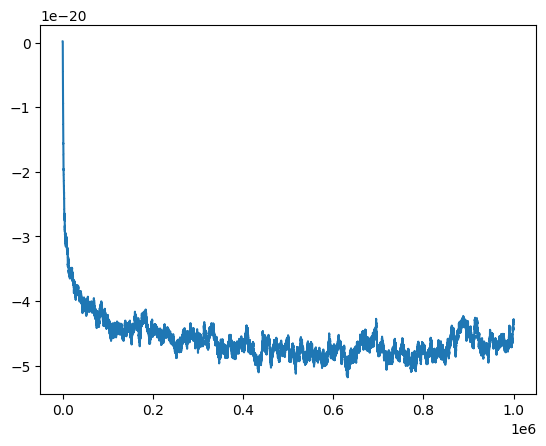

In [146]:
X = np.linspace(0, n+1, n+1)
plt.plot(X,E1)

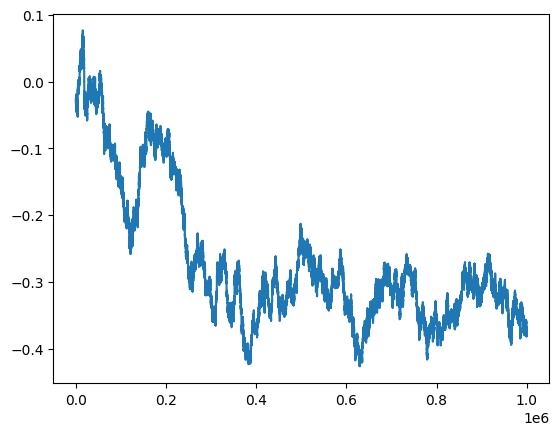

In [147]:
X = np.linspace(0, n, n)
plt.plot(X,S1)

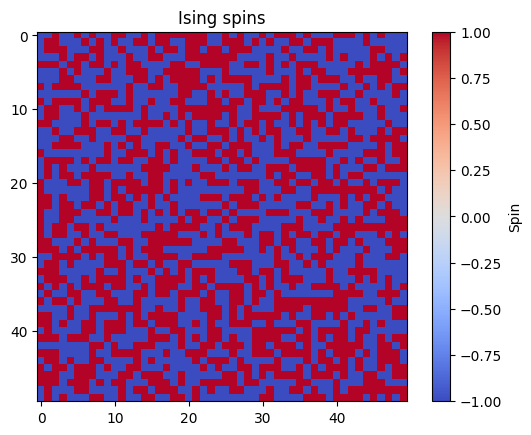

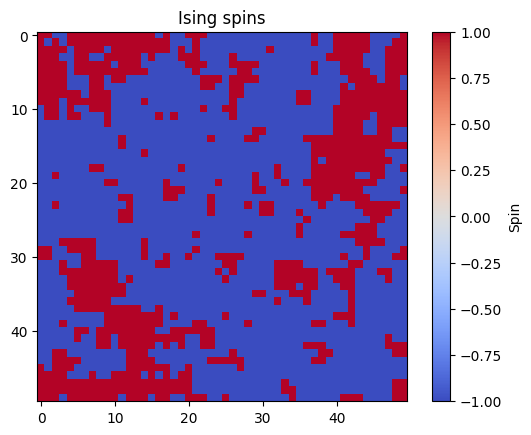

In [148]:
plt.imshow(hist[0], cmap="coolwarm", interpolation="nearest", vmin=-1, vmax=1)
plt.colorbar(label="Spin")
plt.title("Ising spins")
plt.show()
plt.imshow(hist[-1], cmap="coolwarm", interpolation="nearest", vmin=-1, vmax=1)
plt.colorbar(label="Spin")
plt.title("Ising spins")
plt.show()